In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:

# Split the dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Check the shapes of the datasets
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
# Normalize the image data to [0, 1] range
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to include channel dimension (1 channel for grayscale images) That last 1 is the channel dimension, needed for convolutional layers (CNNs) that expect input in the format (height, width, channels).

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) #
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Check the shape of the processed images
print(train_images.shape, test_images.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #Conv2D: Applies 32 filters (feature detectors), each of size 3×3. Applies ReLU (Rectified Linear Unit) to introduce non-linearity. specifies input image shape (height=28, width=28, channels=1 for grayscale).
    layers.MaxPooling2D((2, 2)),#Downsamples the output from the previous layer by selecting the maximum value in each 2×2 patch.

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(), #convert 2D output from the previous layer into a 1D vector so it can be used in a Dense layer
    layers.Dense(64, activation='relu'),#Fully connected layer with 64 neurons. activation='relu': Helps the network learn complex patterns.
    layers.Dense(10, activation='softmax')  # 10 classes for clothing items
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                36928     
          

In [ ]:
# Compile the model with an Adam optimizer and categorical crossentropy loss
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001), #controls how much the model's weights change with respect to the loss.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5046 - accuracy: 0.8162 - val_loss: 0.3667 - val_accuracy: 0.8666
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3198 - accuracy: 0.8832 - val_loss: 0.3256 - val_accuracy: 0.8801
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2744 - accuracy: 0.8989 - val_loss: 0.2887 - val_accuracy: 0.8946
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2439 - accuracy: 0.9111 - val_loss: 0.3125 - val_accuracy: 0.8897
Epoch 5/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2209 - accuracy: 0.9175 - val_loss: 0.2621 - val_accuracy: 0.9031


In [8]:
# Train the model on the training data
history = model.fit(train_images, 
                    train_labels, 
                    epochs=5,
                    validation_data=(test_images, test_labels)
                    )


Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2009 - accuracy: 0.9245 - val_loss: 0.3051 - val_accuracy: 0.8934
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1847 - accuracy: 0.9307 - val_loss: 0.2642 - val_accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1698 - accuracy: 0.9365 - val_loss: 0.2631 - val_accuracy: 0.9099
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1558 - accuracy: 0.9421 - val_loss: 0.2757 - val_accuracy: 0.9066
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1446 - accuracy: 0.9455 - val_loss: 0.2678 - val_accuracy: 0.9113


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.9053
Test accuracy: 90.53%


In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


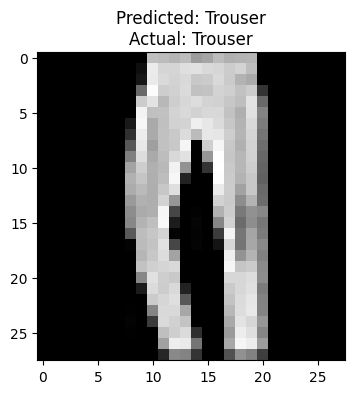

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(4, 4))
plt.imshow(test_images[5].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_names[predictions[5].argmax()]}\nActual: {class_names[test_labels[5]]}")
plt.axis('off')
plt.show()
